Imports

In [12]:
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [13]:
fetch_california_housing().DESCR
Dataset = fetch_california_housing()

Extracting Longitude  and Latitude from dataset

In [14]:
X = Dataset.data
latitude = np.array(X[:, -2])
longitude = np.array(X[:, -1])

Preprocessing

In [15]:
# Checking if there is NULL value at any instance, then we wil remove that entry
valid_mask = ~np.isnan(latitude) & ~np.isnan(longitude)
latitude = latitude[valid_mask]
longitude = longitude[valid_mask]
latitude = latitude.reshape(-1,1)

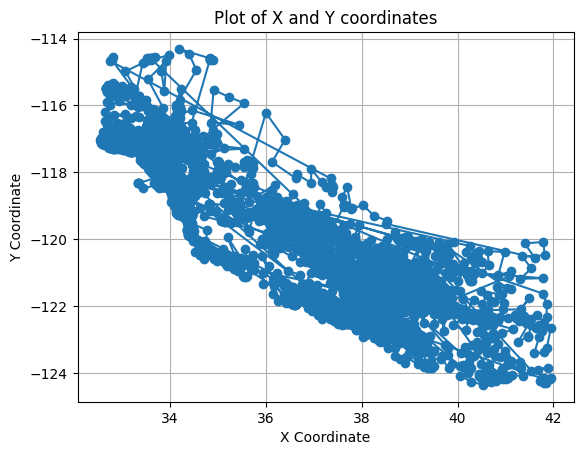

In [16]:
plt.plot(latitude, longitude, marker='o', linestyle='-')
plt.title('Plot of X and Y coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

--**OBJECTIVE 1**

Defining linear_Regression

In [17]:
def linear_regression(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return beta

Printing Efficient Line Equation in 2D plane

In [18]:
beta = linear_regression(latitude, longitude)
slope = beta[1]
intercept = beta[0]
print("Best-fit line equation: y = {:.2f}x + {:.2f}".format(slope, intercept))

Best-fit line equation: y = -0.87x + -88.66


--**OBJECTIVE 2**

In [19]:
def huber_loss(beta, X, y, delta):
    """
    Compute the Huber loss given the regression coefficients, predictors, target values, and delta parameter.

    Parameters:
        beta (array): Regression coefficients.
        X (array): Predictor variables.
        y (array): Target values.
        delta (float): Huber loss threshold.

    Returns:
        float: Huber loss.
    """
    # Calculate absolute residuals
    residuals = np.abs(X.dot(beta) - y)
    # Compute Huber loss
    loss = np.sum(np.where(residuals <= delta, 0.5 * residuals**2, delta * (residuals - 0.5 * delta)))
    return loss

Implementing main function of objective 2

In [20]:
def fit_fair_line(X, y, delta=1.0):
    """
    Fit a line to the data using the Huber loss optimization.

    Parameters:
        X (array): Predictor variables.
        y (array): Target values.
        delta (float): Huber loss threshold.

    Returns:
        array: Regression coefficients.
    """
    # Initialize regression coefficients
    initial_guess = np.zeros(X.shape[1])
    # Minimize the Huber loss function
    result = minimize(huber_loss, initial_guess, args=(X, y, delta))
    # Extract regression coefficients
    beta = result.x
    return beta

Printing Fair line

In [21]:
latitude_with_bias = np.hstack((np.ones((latitude.shape[0], 1)), latitude))
beta_fair = fit_fair_line(latitude_with_bias, longitude)
intercept_fair = beta_fair[0]
slope_fair = beta_fair[1]
print("Fair line equation: y = {:.2f}x + {:.2f}".format(slope_fair, intercept_fair))

Fair line equation: y = -0.90x + -87.62
